# 1) Packages

In [1]:
import numpy as np
from numpy import array, hstack
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns


from datetime import datetime, timedelta


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.utils import shuffle

from sklearn import preprocessing

rcParams['figure.figsize'] = 20, 6

In [3]:
import pulp

# 2) Getting File Names in a Folder

In [4]:
# Getting all the files in the directory.
def existing_file_list(path):
    ''' Extracting File Names '''

    allFiles = glob.glob(path + "/*.csv")
    new_list = []
    for i in allFiles:
        before = 'original\\'
        after = '_minute'
        ticker = i[i.find(before) + len(before) : i.find(after)]
        new_list.append(ticker)    
    #list_ticker = list(filter(None, text))  # drop all the empty elements and put them in a list
        
    return (new_list)


In [5]:
datapath = 'D:\\OneDrive - Georgia State University\\Data Science\\Personal_Project\\FPL_Analysis\\Data\\'

from os import listdir
from os.path import isfile, join
main_data_list = [f for f in listdir(datapath) if isfile(join(datapath, f))]

In [6]:
datapath

'D:\\OneDrive - Georgia State University\\Data Science\\Personal_Project\\FPL_Analysis\\Data\\'

In [7]:
main_data_list

['elements_df.csv',
 'element_types2019.csv',
 'element_types_df.csv',
 'fixture_df.csv',
 'fixture_final_test.csv',
 'history_df.csv',
 'history_final_training.csv',
 'teams2019.csv',
 'teams_df.csv']

# 3) Exploratory Data Analysis

## 3.1) Import Data

In [8]:
#element_types = pd.read_csv(datapath + 'element_types.xlsx',index_col='id', engine = 'python')

#main_data = pd.read_csv(datapath + 'each_player_each_game.csv', index_col=['id', 'fixture'], engine = 'python')
history = pd.read_csv(datapath + 'history_final_training.csv', index_col=0, engine = 'python')
fixture = pd.read_csv(datapath + 'fixture_final_test.csv', index_col=0, engine = 'python')

bootstrap = pd.read_csv(datapath + 'elements_df.csv', index_col=0, engine = 'python')
element_type = pd.read_csv(datapath + 'element_types_df.csv', index_col=0, engine = 'python')
teams = pd.read_csv(datapath + 'teams_df.csv', index_col=0, engine = 'python')

In [9]:
history.head()
fixture.head()

bootstrap.head()
element_type.head()
teams.head()

,player_id,team,opponent_team,home,round,total_points
0,1,1,13.0,False,1.0,0.0
1,1,1,5.0,True,2.0,0.0
2,1,1,10.0,False,3.0,0.0
3,1,1,17.0,True,4.0,0.0
4,1,1,18.0,False,5.0,0.0


,player_id,team,difficulty,opponent_team,home,round
0,1,1,3.0,5.0,False,25.0
1,2,1,3.0,5.0,False,25.0
2,3,1,3.0,5.0,False,25.0
3,4,1,3.0,5.0,False,25.0
4,5,1,3.0,5.0,False,25.0


,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index
0,25.0,100.0,69140,0,0,-4,4,0,2,0.6,...,0,0,0,0,1,77,111.6,12.9,75.0,20.0
1,100.0,100.0,98745,0,0,-1,1,0,2,2.5,...,0,2,0,0,1,54,83.4,24.8,24.0,13.3
2,0.0,0.0,111457,0,0,-3,3,0,2,0.0,...,0,3,0,0,1,219,190.0,156.3,67.0,41.2
3,100.0,100.0,154043,0,0,-4,4,1,2,2.7,...,0,3,1,0,3,216,261.8,155.4,37.0,44.9
4,100.0,75.0,39476,0,0,-1,1,1,2,4.7,...,0,5,0,0,5,286,431.6,31.8,106.0,57.1


,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12]
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[]
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[]
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[]


,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away
0,3,0,NaN,1,0,Arsenal,0,0,0,ARS,4,NaN,False,0,1230,1270,1150,1190,1280,1330
1,7,0,NaN,2,0,Aston Villa,0,0,0,AVL,2,NaN,False,0,1040,1080,1030,1060,1030,1050
2,91,0,NaN,3,0,Bournemouth,0,0,0,BOU,3,NaN,False,0,1090,1120,1030,1070,1110,1180
3,36,0,NaN,4,0,Brighton,0,0,0,BHA,3,NaN,False,0,1050,1120,1040,1160,1030,1130
4,90,0,NaN,5,0,Burnley,0,0,0,BUR,3,NaN,False,0,1050,1110,1060,1130,1050,1050


In [10]:
element_type

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12]
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[]
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[]
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[]


In [11]:
bootstrap.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index'],
      dtype='object')

In [12]:
df = bootstrap[['id','first_name','second_name','web_name', 'team', 'team_code', 'form','value_form', 'element_type', 'chance_of_playing_next_round', 'chance_of_playing_this_round',  'ep_next',
       'ep_this', 'event_points', 'in_dreamteam', 'dreamteam_count', 'now_cost','points_per_game', 'selected_by_percent', 
             'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out', 'transfers_out_event']]

# Optimizing the team

In [18]:
from pulp import *

In [ ]:
def select_team(expected_scores, prices, positions, clubs, difficulties, chance_of_playing_next_round, total_budget=100, sub_factor=0.2, difficulty=2, chance_next = 75):
    num_players = len(expected_scores)
    model = pulp.LpProblem("Constrained value maximization", pulp.LpMaximize)
    
    decisions = [
        pulp.LpVariable("x{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    captain_decisions = [
        pulp.LpVariable("y{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    sub_decisions = [
        pulp.LpVariable("z{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]


    # objective function:
    model += sum((captain_decisions[i] + decisions[i] + (sub_decisions[i]*sub_factor)) * expected_scores[i] for i in range(num_players)), "Objective"

    # cost constraint
    model += sum((decisions[i] + sub_decisions[i]) * prices[i] for i in range(num_players)) <= total_budget  # total cost

    # position constraints and difficulty contraints and chance_of_playing_next_round 
    # 1 starting goalkeeper
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 1 and difficulties[i] <= difficulty and chance_of_playing_next_round[i] > chance_next) == 1
    # 2 total goalkeepers
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 1) == 2

    # 3-5 starting defenders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2 and difficulties[i] <= difficulty and chance_of_playing_next_round[i] > chance_next) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2 and difficulties[i] <= difficulty and chance_of_playing_next_round[i] > chance_next) <= 5
    # 5 total defenders
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 2) == 5

    # 3-5 starting midfielders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3 and difficulties[i] <= difficulty and chance_of_playing_next_round[i] > chance_next) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3 and difficulties[i] <= difficulty and chance_of_playing_next_round[i] > chance_next) <= 5
    # 5 total midfielders
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 3) == 5

    # 1-3 starting attackers
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4 and difficulties[i] <= difficulty and chance_of_playing_next_round[i] > chance_next) >= 1
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4 and difficulties[i] <= difficulty and chance_of_playing_next_round[i] > chance_next) <= 3
    # 3 total attackers
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 4) == 3

    # club constraint
    for club_id in np.unique(clubs):
        model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if clubs[i] == club_id) <= 3  # max 3 players

    model += sum(decisions) == 11  # total team size
    model += sum(captain_decisions) == 1  # 1 captain
    
    for i in range(num_players):  
        model += (decisions[i] - captain_decisions[i]) >= 0  # captain must also be on team
        model += (decisions[i] + sub_decisions[i]) <= 1  # subs must not be on team

    
    
    model.solve()
    status = model.solve()
    print(f'This problem is {LpStatus[status]}')

    print("Total expected score = {}".format(model.objective.value()))

    return decisions, captain_decisions, sub_decisions


In [40]:
def select_team(expected_scores, prices, positions, clubs, chance_of_playing_next_round, total_budget=100, sub_factor=0.2, chance_next = 75):
    num_players = len(expected_scores)
    model = pulp.LpProblem("Constrained value maximization", pulp.LpMaximize)
    
    decisions = [
        pulp.LpVariable("x{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    captain_decisions = [
        pulp.LpVariable("y{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    sub_decisions = [
        pulp.LpVariable("z{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]


    # objective function:
    model += sum((captain_decisions[i] + decisions[i] + (sub_decisions[i]*sub_factor)) * expected_scores[i] for i in range(num_players)), "Objective"

    # cost constraint
    model += sum((decisions[i] + sub_decisions[i]) * prices[i] for i in range(num_players)) <= total_budget  # total cost

    # position constraints and difficulty contraints and chance_of_playing_next_round 
    # 1 starting goalkeeper
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 1 and chance_of_playing_next_round[i] > chance_next) == 1
    # 2 total goalkeepers
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 1) == 2

    # 3-5 starting defenders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2 and chance_of_playing_next_round[i] > chance_next) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2 and chance_of_playing_next_round[i] > chance_next) <= 5
    # 5 total defenders
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 2) == 5

    # 3-5 starting midfielders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3 and chance_of_playing_next_round[i] > chance_next) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3 and chance_of_playing_next_round[i] > chance_next) <= 5
    # 5 total midfielders
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 3) == 5

    # 1-3 starting attackers
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4 and chance_of_playing_next_round[i] > chance_next) >= 1
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4 and chance_of_playing_next_round[i] > chance_next) <= 3
    # 3 total attackers
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 4) == 3

    # club constraint
    for club_id in np.unique(clubs):
        model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if clubs[i] == club_id) <= 3  # max 3 players

    model += sum(decisions) == 11  # total team size
    model += sum(captain_decisions) == 1  # 1 captain
    
    for i in range(num_players):  
        model += (decisions[i] - captain_decisions[i]) >= 0  # captain must also be on team
        model += (decisions[i] + sub_decisions[i]) <= 1  # subs must not be on team

    
    
    model.solve()
    status = model.solve()
    print(f'This problem is {LpStatus[status]}')

    print("Total expected score = {}".format(model.objective.value()))

    return decisions, captain_decisions, sub_decisions


In [41]:
# mapping id with actual names

df['team_name'] = df['team'].map(teams.set_index('id')['name'])
df['positions'] = df['element_type'].map(element_type.set_index('id')['plural_name_short'])

D:\Programming\Anaconda\envs\fpl\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programming\Anaconda\envs\fpl\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
expected_scores = df['ep_next'] # total points from the last season
prices = df['now_cost']/10
positions = df['element_type']
clubs = df['team_code']
difficulties = fixture['difficulty']
chance_of_playing_next_round = df['chance_of_playing_next_round']

# so we can read the result
names = df['web_name']
position = df['positions']
team = df['team_name']

decisions, captain_decisions, sub_decisions = select_team(expected_scores, prices, positions, clubs, chance_of_playing_next_round, total_budget=99.1, sub_factor=0.2, chance_next = 75)

D:\Programming\Anaconda\envs\fpl\lib\site-packages\pulp\pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


PulpSolverError: Pulp: Error while executing D:\Programming\Anaconda\envs\fpl\lib\site-packages\pulp\solverdir\cbc\win\64\cbc.exe

In [ ]:
from IPython.display import display, Markdown, Latex


for i in range(df.shape[0]):
    if value(decisions[i]) == 1:
        display(Markdown("**{}** Points = {}, Price = {}, Team = {}, Position = {}".format(names[i], expected_scores[i], prices[i], team[i], position[i])))
        
for i in range(df.shape[0]):
    if value(sub_decisions[i]) == 1:
        (display(Markdown("**sub: {}** Points = {}, Price = {}, Team = {}, Position = {}".format(names[i], expected_scores[i], prices[i], team[i], position[i]))))
        
for i in range(df.shape[0]):
    if value(captain_decisions[i]) == 1:
        (display(Markdown("**CAPTAIN: {}** Points = {}, Price = {}, Team = {}, Position = {}".format(names[i], expected_scores[i], prices[i], team[i], position[i]))))  

In [16]:
value(decisions), value(sub_decisions), value(captain_decisions), value(model.objective)

AttributeError: 'list' object has no attribute 'value'

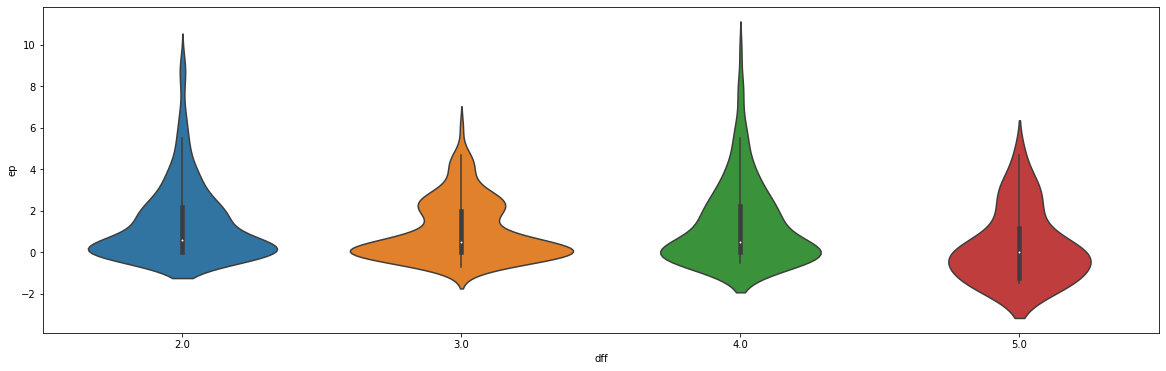

In [39]:
import seaborn

g = pd.DataFrame({'dff':difficulties, 'ep':expected_scores})
seaborn.violinplot(data=g, y = 'ep', x='dff')

- change time 0 to 24
- compare graphs
- one-variable
- interaction term
- box plot

# To-do

In [46]:
def pairplot(column_list):
    
    simple_main_data = df[column_list]

    # Time vs Temperature vs Load pairplot
    sns.set(style="ticks", color_codes=True)

    sns_plot = sns.pairplot(simple_main_data)
    #sns_plot.savefig(main_data_dir + "_pairplot.png")

  
pairplot(column_list)

KeyError: "['difficulty'] not in index"

## 4.2) Pairplot

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x14336c08320>,
 <a list of 5 Text xticklabel objects>)

Text(0, 0.5, 'Points')

Text(0.5, 1.0, 'Points Earned by Positions')

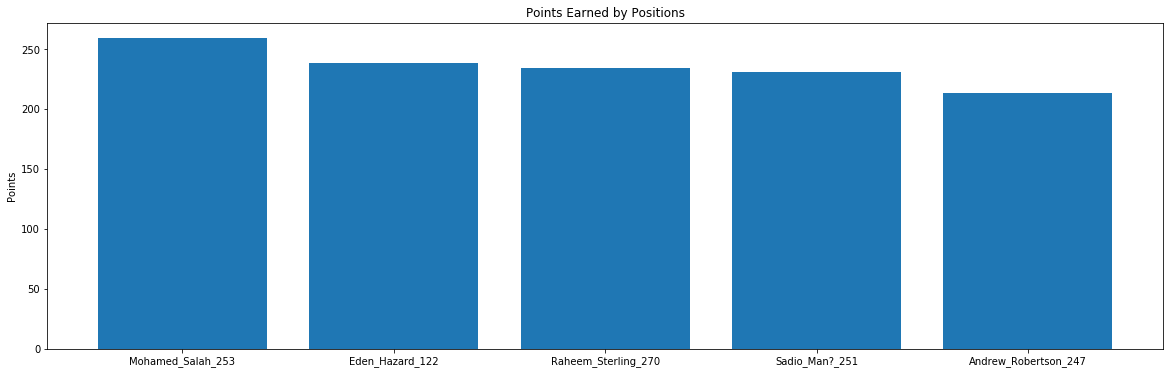

In [41]:
rcParams['figure.figsize'] = 20, 6

#objects = ('GK', 'FW', 'MF', 'DF')
objects = by_player.head().index

y_pos = np.arange(len(objects))

plt.bar(objects, by_player['total_points'].head(), align='center')

plt.xticks(y_pos, objects)
plt.ylabel('Points')
plt.title('Points Earned by Positions')

plt.show()

In [35]:
by_player['total_points'].head()

name
Mohamed_Salah_253       259
Eden_Hazard_122         238
Raheem_Sterling_270     234
Sadio_Man?_251          231
Andrew_Robertson_247    213
Name: total_points, dtype: int64

## 4.1) Plot

In [16]:
value(decisions), value(sub_decisions), value(captain_decisions), value(model.objective)

AttributeError: 'list' object has no attribute 'value'